In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('walmart_data.csv')

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [4]:
df.shape

(550068, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


# Checking the null values

In [6]:
df.isnull().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category              False
Purchase                      False
dtype: bool

# Checking null values in percentage

In [7]:
df.isnull().sum()/df.shape[0]*100

User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category              0.0
Purchase                      0.0
dtype: float64

### Insight
#####    * There are no null values in DataSet provided

# Unique values in each attribute

In [8]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

### Insight
##### * We can drop User_ID and Product_ID for model prediction as it has more unique values

# Target variable purchase

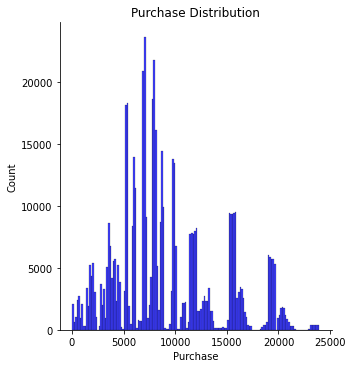

In [9]:
sns.displot(x=df['Purchase'],color='blue')
plt.title('Purchase Distribution')
plt.show()

### Insight
#####  * we can observe that purchase amount is repeating for many customers. This can be because many people could be buying discounted product on large number

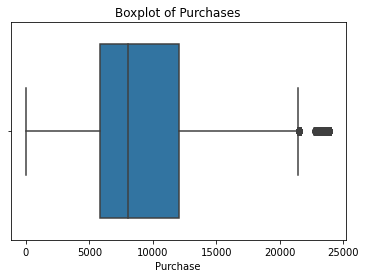

In [10]:
sns.boxplot(x=df['Purchase'])
plt.title("Boxplot of Purchases")
plt.show()

In [11]:
df['Purchase'].skew()

0.6001400037087128

In [12]:
df['Purchase'].kurtosis()

-0.3383775655851702

In [13]:
df['Purchase'].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

### Insight
#####    * The purchase is right skewed and we can do log transformation for the purchase

# Gender

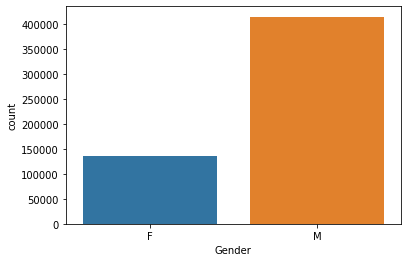

In [14]:
sns.countplot(x=df['Gender'])
plt.show()

In [15]:
df.Gender.value_counts(normalize=True)*100

M    75.310507
F    24.689493
Name: Gender, dtype: float64

### Insight
#####   * Obviously more Male customers than Females

In [16]:
df.groupby('Gender').mean()['Purchase']

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

### Insight
#####   * On average Males spends more money in comaparison to Females.

# Marital status

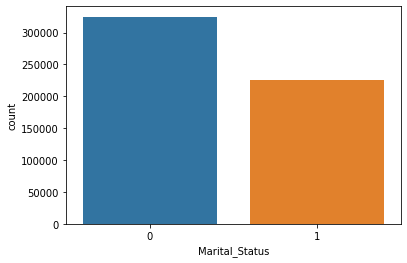

In [17]:
sns.countplot(x=df['Marital_Status'])
plt.show()

### Insight
#####   * More of unmarried people spend more on purchasing 

In [18]:
df.groupby('Marital_Status').mean()['Purchase']

Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

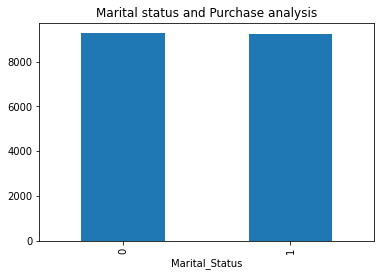

In [19]:
df.groupby('Marital_Status').mean()['Purchase'].plot(kind='bar')
plt.title('Marital status and Purchase analysis')
plt.show()

### Insight
#####   * Though unmarried people spend more on purchasing, The average purchase amount of the unmarried and married people are     the same  

# Occupation

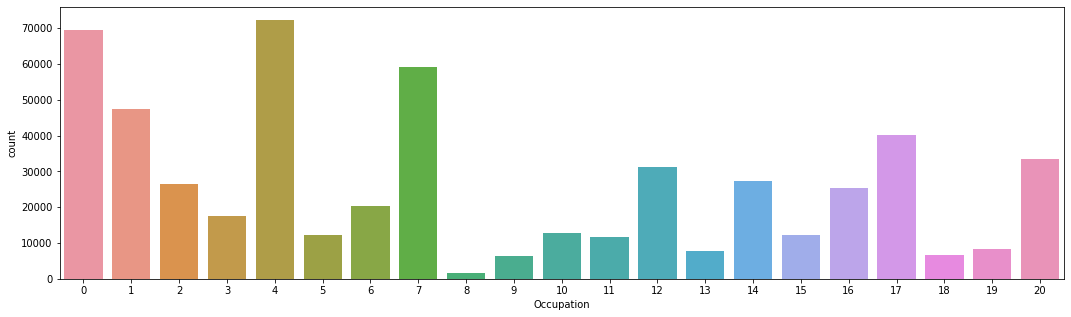

In [20]:
plt.figure(figsize=(18,5))
sns.countplot(x=df['Occupation'])
plt.show()

### Insight
#####   * There are atleast 20 different occupation. Since we dont know which number corresponds to which occupation, it is difficult to make any analysis. Furthermore, it seems we have no alternative but to use this data as there is no option to reduce the number count

In [21]:
occupation=pd.DataFrame(df.groupby('Occupation').mean())['Purchase']
occupation

Occupation
0     9124.428588
1     8953.193270
2     8952.481683
3     9178.593088
4     9213.980251
5     9333.149298
6     9256.535691
7     9425.728223
8     9532.592497
9     8637.743761
10    8959.355375
11    9213.845848
12    9796.640239
13    9306.351061
14    9500.702772
15    9778.891163
16    9394.464349
17    9821.478236
18    9169.655844
19    8710.627231
20    8836.494905
Name: Purchase, dtype: float64

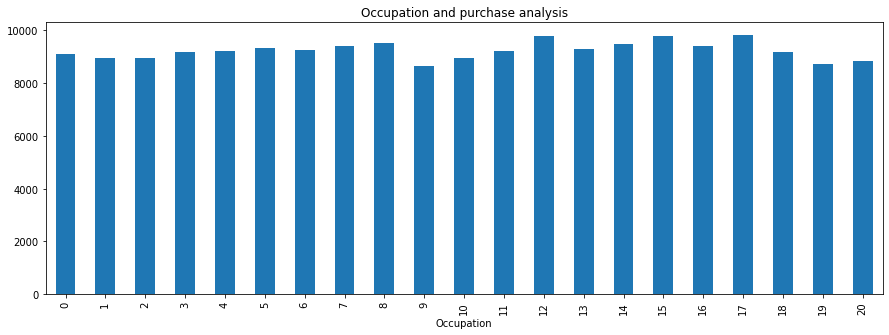

In [22]:
occupation.plot(kind='bar',figsize=(15,5))
plt.title('Occupation and purchase analysis')
plt.show()

### Insight
#####   * Although there are some occupations which have higher representation, it seems the amount each user spends on average is more or less the same for all occupations. Ofcourse, in the end, occupations with the higher representation will have the highest amount of purchases.

# City_Category

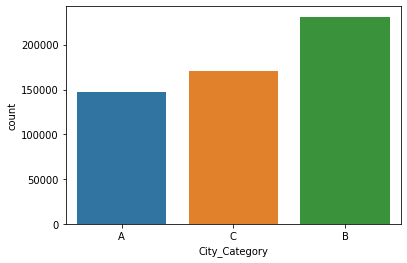

In [23]:
sns.countplot(x=df['City_Category'])
plt.show()

### Insight
#####   * From the above representations it is clear that City of Category B has the highest number of purchases

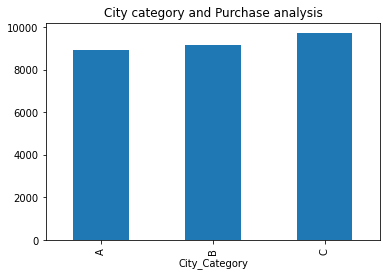

In [24]:
df.groupby('City_Category').mean()['Purchase'].plot(kind='bar')
plt.title('City category and Purchase analysis')
plt.show()

### Insight
####   * Residents of the City of Category C spends the most on buying

# Stay_In_Current_City_Years

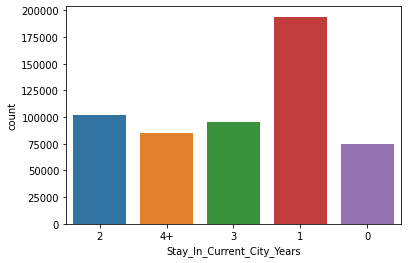

In [25]:
sns.countplot(x=df['Stay_In_Current_City_Years'])
plt.show()

### Insight
#####    * It looks like the more someone living at one place is less willing to buy new things. If someone is new to town he will need new things for their house they will take the advantage of low prices on blcck friday to buy all things they needed

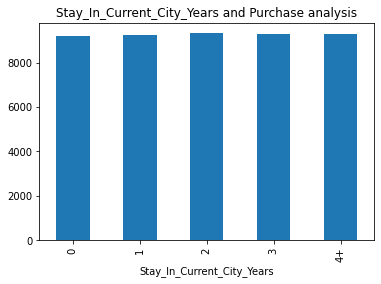

In [26]:
df.groupby('Stay_In_Current_City_Years').mean()['Purchase'].plot(kind='bar')
plt.title('Stay_In_Current_City_Years and Purchase analysis')
plt.show()

### Insight
#####   * As seen earlier people tend to spend same amount on purchase regardless of group, but people who are new to town tend to spent more money on purchases. If sneakpeaked individually people tend to spent same amount independently of how many years they have lived in current city

# Age

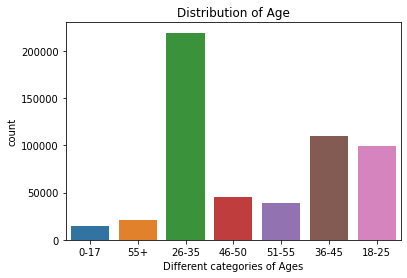

In [27]:
sns.countplot(x=df['Age'])
plt.title('Distribution of Age')
plt.xlabel("Different categories of Ages")
plt.show()

### Insight
#####   * Age group of 26-35 makes most number of purchases

<AxesSubplot:xlabel='Age'>

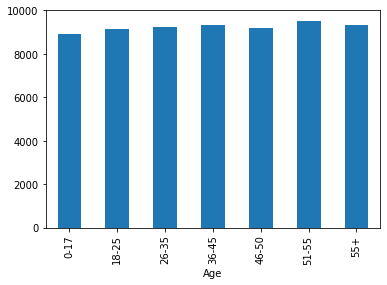

In [28]:
df.groupby('Age').mean()['Purchase'].plot(kind='bar')

### Insight
#####   * Mean of purchase rate between the age groups tends to be nearly same except that the age group 51-55 has a slightly     higher purchase rate

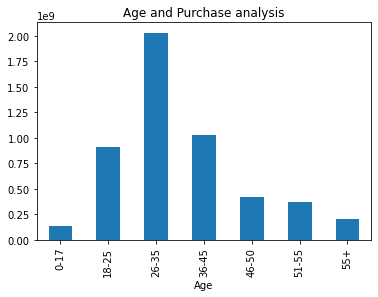

In [29]:
df.groupby('Age').sum()['Purchase'].plot(kind='bar')
plt.title('Age and Purchase analysis')
plt.show()

### Insight
#####   * Total amount of purchases made is in accordance with the number of purchases made, distributed by ages

# Product

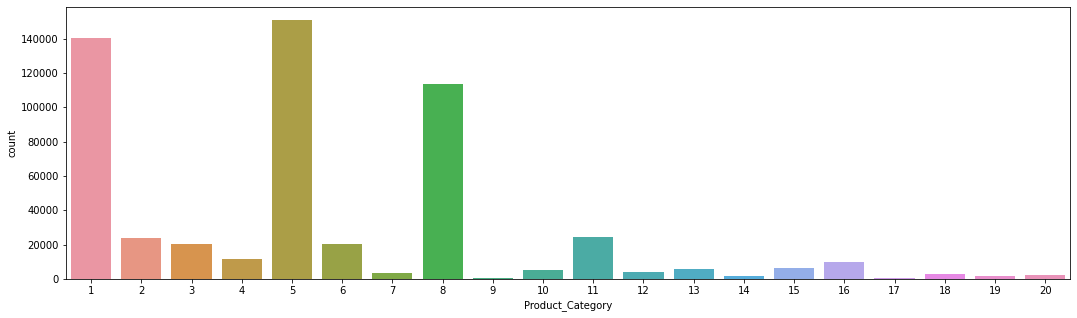

In [30]:
plt.figure(figsize=(18,5))
sns.countplot(x=df['Product_Category'])
plt.show()

### Insight
#####   * From the above representation it is clear that 1, 5 and 8 clearly standout, Unfortunately we dont know the which numebr represents which category

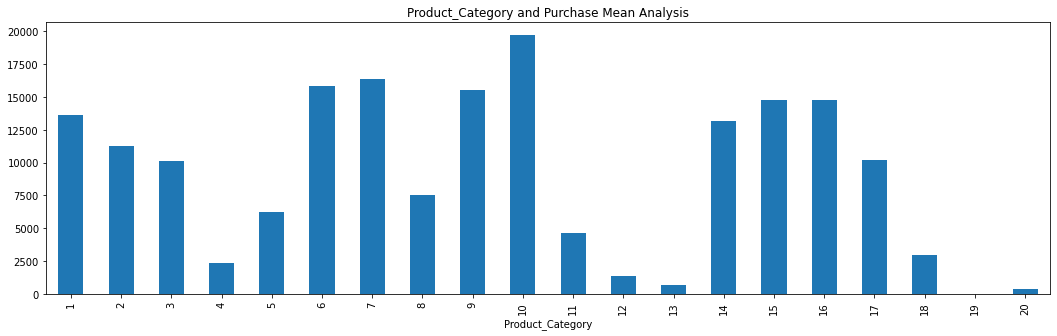

In [31]:
df.groupby('Product_Category').mean()['Purchase'].plot(kind='bar',figsize=(18,5))
plt.title("Product_Category and Purchase Mean Analysis")
plt.show()

### Insight
#####    * If you see the value spent on average for Product_Category you see that although there were more products bought for     categories 1,5,8 the average amount spent for those three is not the highest. It is interesting to see other  categories appearing with high purchase values despite having low impact on sales number.

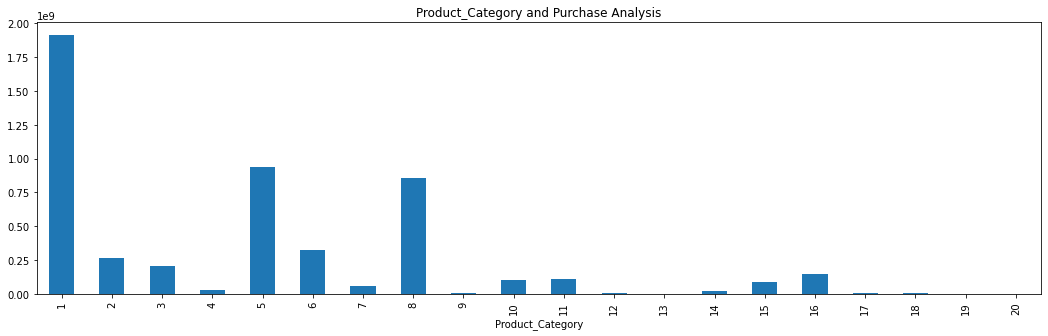

In [32]:
df.groupby('Product_Category').sum()['Purchase'].plot(kind='bar',figsize=(18,5))
plt.title("Product_Category and Purchase Analysis")
plt.show()

### Insight
#####   * The distribution that we saw for this predictor previously appears here. For example, those three products have the highest sum of sales since they were three most sold products.

In [33]:
df.corr()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,-0.000463
Product_Category,0.003825,-0.007618,0.019888,1.000000,-0.343703
Purchase,0.004716,0.020833,-0.000463,-0.343703,1.000000


# Heatmap

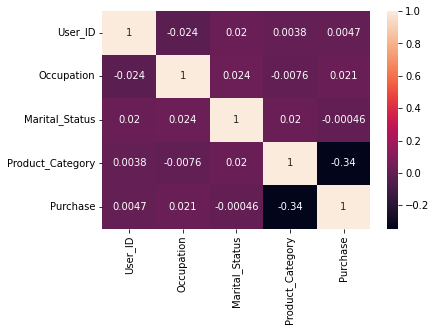

In [34]:
sns.heatmap(df.corr(),annot=True)
plt.show()

### Insight
#####   * There is some relation between Product_Category group

In [35]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [36]:
data=df.copy()

In [37]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


# Encoding the categorical Values

In [38]:
lr=LabelEncoder()

In [39]:
data['Gender']=lr.fit_transform(data['Gender'])

In [40]:
data['Age']=lr.fit_transform(data['Age'])

In [41]:
data['City_Category']=lr.fit_transform(data['City_Category'])

In [42]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,8370
1,1000001,P00248942,0,0,10,0,2,0,1,15200
2,1000001,P00087842,0,0,10,0,2,0,12,1422
3,1000001,P00085442,0,0,10,0,2,0,12,1057
4,1000002,P00285442,1,6,16,2,4+,0,8,7969


In [43]:
data.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  int32 
 3   Age                         550068 non-null  int32 
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  int32 
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int32(3), int64(5), object(2)
memory usage: 35.7+ MB


# Dropping the irrelevant columns

In [45]:
data=data.drop(['User_ID','Product_ID'],axis=1)

In [46]:
data

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,0,0,10,0,2,0,3,8370
1,0,0,10,0,2,0,1,15200
2,0,0,10,0,2,0,12,1422
3,0,0,10,0,2,0,12,1057
4,1,6,16,2,4+,0,8,7969
...,...,...,...,...,...,...,...,...
550063,1,5,13,1,1,1,20,368
550064,0,2,1,2,3,0,20,371
550065,0,2,15,1,4+,1,20,137
550066,0,6,1,2,2,0,20,365


# Recommendations

    1) More of discounted products could be made available as more number of people are buying the discounted items and they may fall low on inventory.
    2) Targetting more of Female customers can lead to more sale as seen from the dataset, female customers are moving less towards the walmart.
    3) Unmarried people spend more on purchasing through a walmart, so inorder to extend the sales reaching out to married people will be a plus point in terms of    sales.
    4) The people from the occupations of category 2,3,5,68,9,10,1113,15,16,18,19 has to be considered more and has to be given a priority as many of the people will    be from this occupation category and are lagging from purchasing products from     walmart.
    5) As the city of category B is doing good and city of category C is average.    While City of category A is less in purchasing from the walmart, So hitting the     audience from the city of cateogry A will give a rise in the sales. Although the average spending of all the categories are same.
    6) As seen from the "Stay_In_Current_City_Years" people living at the same place    for long time are investing less time and money on purchasing from walmart, whereas the people which are new to city/place are tending to buy more from the walmart.     So to increase the sales from this kind of category doing two things is possible
        a) Approaching people which are coming new to city/Place will give rise in     sales but as number of people coming new will always be less than people staying     there resulting in less growth of business
        b) Making more availability of daily needing products will give a considering amount of growth in business as more people will move towards buying from the     walmart at great price.
        Although the average amount of money spend by all the people from the walmart is nearly equal for all poeple
    7) People of the age group 26-35 buy more items from the walmart, so making      product availability for the other age groups can affect in positive growth of sales in walmart.
    8) As the product categories are the numerical values and we dont know which     number represents which product we cant say anything about the     product. But the products of categories 1,5,8 are most selling products and 2,3,6 and 11 are average    selling products. Looking into other product categories, making them available at the      store can give addition in sales.